In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use("classic")
%matplotlib inline

In [2]:
df = pd.read_csv("hate_crimes_data\hate_crimes.csv")

In [3]:
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   incident_number     82 non-null     object
 1   date_of_incident    82 non-null     object
 2   victims_under_18    82 non-null     int64 
 3   victims_over_18     82 non-null     int64 
 4   offenders_under_18  82 non-null     int64 
 5   offenders_over_18   82 non-null     int64 
 6   offender_race       82 non-null     object
 7   offense             82 non-null     object
 8   offense_location    82 non-null     object
 9   bias                82 non-null     object
dtypes: int64(4), object(6)
memory usage: 6.5+ KB


None

,incident_number,date_of_incident,victims_under_18,victims_over_18,offenders_under_18,offenders_over_18,offender_race,offense,offense_location,bias
0,2017-241137,1/1/2017,0,1,0,1,White,Aggravated Assault,Park/Playground,Anti-Black
1,2017-580344,2/1/2017,0,1,0,1,Black,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White
2,2017-800291,3/21/2017,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish
3,2017-1021534,4/12/2017,0,0,0,0,White,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish
4,2017-1351550,5/15/2017,1,0,1,2,White,Simple Assault,Residence/Home,Anti-LGBT


,incident_number,date_of_incident,victims_under_18,victims_over_18,offenders_under_18,offenders_over_18,offender_race,offense,offense_location,bias
77,2020-3110610,11/6/2020,0,1,0,1,White,Assault with Injury,Specialty Store,Anti-LGBT
78,2020-3170909,11/12/2020,0,1,0,1,Unknown,Bomb Threat,Government/ Public Building,Anti-Black
79,2020-3261352,11/21/2020,0,1,0,1,White,Reckless Driving,Streets/Highway/Road/Alley,Anti-Black
80,2020-3350913,11/30/2020,0,1,0,1,Black,Burglary of Residence,Residence/Home,Anti-LGBT
81,2021-5002678,1/11/2021,0,1,0,0,Unknown,Criminal Mischief,Residence/Home,Anti-Jewish


In [4]:
def clean_data(df):

    """Converting and setting the index"""
    df["date_of_incident"] = df["date_of_incident"].astype("datetime64")
    df.set_index(["date_of_incident"], inplace=True)
    df.sort_index(inplace=True)

    """Converting the following to category type"""
    cat_col = ["bias", "offense", "offense_location", "offender_race"]
    df[cat_col] = df[cat_col].astype("category")

    return df


df = clean_data(df)

In [5]:
display(df.head())
display(df.tail())

,incident_number,victims_under_18,victims_over_18,offenders_under_18,offenders_over_18,offender_race,offense,offense_location,bias
date_of_incident,,,,,,,,,
2017-01-01,2017-241137,0,1,0,1,White,Aggravated Assault,Park/Playground,Anti-Black
2017-02-01,2017-580344,0,1,0,1,Black,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White
2017-03-21,2017-800291,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish
2017-04-12,2017-1021534,0,0,0,0,White,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish
2017-05-15,2017-1351550,1,0,1,2,White,Simple Assault,Residence/Home,Anti-LGBT


,incident_number,victims_under_18,victims_over_18,offenders_under_18,offenders_over_18,offender_race,offense,offense_location,bias
date_of_incident,,,,,,,,,
2020-11-06,2020-3110610,0,1,0,1,White,Assault with Injury,Specialty Store,Anti-LGBT
2020-11-12,2020-3170909,0,1,0,1,Unknown,Bomb Threat,Government/ Public Building,Anti-Black
2020-11-21,2020-3261352,0,1,0,1,White,Reckless Driving,Streets/Highway/Road/Alley,Anti-Black
2020-11-30,2020-3350913,0,1,0,1,Black,Burglary of Residence,Residence/Home,Anti-LGBT
2021-01-11,2021-5002678,0,1,0,0,Unknown,Criminal Mischief,Residence/Home,Anti-Jewish


In [6]:
df.duplicated().sum()

12

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.to_csv("hate_crimes.csv")

Anti-Black                27
Anti-LGBT                 21
Anti-Hispanic              7
Anti-Jewish                4
Anti-Muslim                4
Anti-White                 4
Anti-Buddhist              1
Anti-Disability            1
Anti-LGBT; Anti-Jewish     1
Name: bias, dtype: int64

----------------------------------


Anti-Black                0.385714
Anti-LGBT                 0.300000
Anti-Hispanic             0.100000
Anti-Jewish               0.057143
Anti-Muslim               0.057143
Anti-White                0.057143
Anti-Buddhist             0.014286
Anti-Disability           0.014286
Anti-LGBT; Anti-Jewish    0.014286
Name: bias, dtype: float64

C:\Users\Robert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


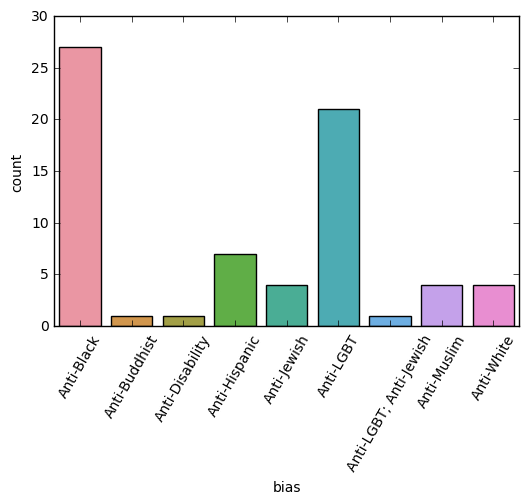

In [13]:
# Create and display a dataframe of the biases
bias = df.bias.value_counts()
display(bias)

# Create and display a dataframe of the biases as percentages
bias_pct = df.bias.value_counts(normalize=True)
print("----------------------------------")
display(df.bias.value_counts(normalize=True))

# bias.sort_values().plot.barh(title='hate crimes by bias since 2017')
plt.figure(dpi=100)
sb.countplot(df.bias)
plt.xticks(rotation="60")
plt.show()

Assault                  21
Criminal Mischief        10
Simple Assault            8
Intimidation              7
Aggravated Assault        6
Vandalism                 4
Assault with Injury       3
Assault by Threat         2
Destruction               2
Assault by Contact        1
Bomb Threat               1
Burglary of Residence     1
Burglary/Assault          1
Reckless Driving          1
Robbery                   1
Theft                     1
Name: offense, dtype: int64

----------------------------------


Assault                  0.300000
Criminal Mischief        0.142857
Simple Assault           0.114286
Intimidation             0.100000
Aggravated Assault       0.085714
Vandalism                0.057143
Assault with Injury      0.042857
Assault by Threat        0.028571
Destruction              0.028571
Assault by Contact       0.014286
Bomb Threat              0.014286
Burglary of Residence    0.014286
Burglary/Assault         0.014286
Reckless Driving         0.014286
Robbery                  0.014286
Theft                    0.014286
Name: offense, dtype: float64

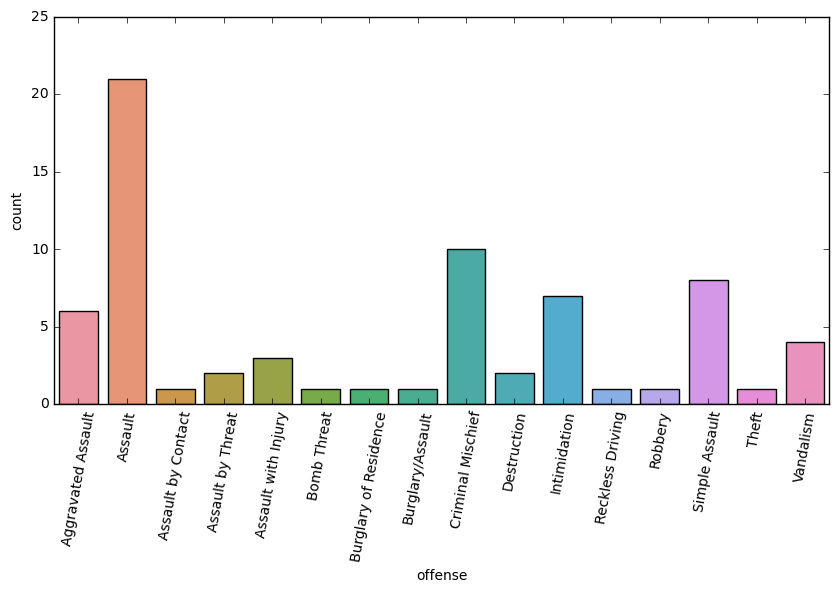

In [24]:
# Create a dataframe for the offense values
offense_count = df.offense.value_counts()
display(offense_count)

# Displaying the offense values as proportions
print("----------------------------------")
offense_count_pct = df.offense.value_counts(normalize=True)
display(offense_count_pct)

# offense_count.sort_values().plot.barh(title='types of hate crimes since 2017')
plt.figure(figsize=(10, 5), dpi=100)
sb.countplot(df.offense)
plt.xticks(rotation="80")
plt.show()

White                      30
Unknown                    14
Hispanic                   13
Black                       8
Group of Multiple Races     3
Asian                       1
Hispanic (2) White (2)      1
Name: offender_race, dtype: int64

----------------------------------


White                      0.428571
Unknown                    0.200000
Hispanic                   0.185714
Black                      0.114286
Group of Multiple Races    0.042857
Asian                      0.014286
Hispanic (2) White (2)     0.014286
Name: offender_race, dtype: float64

C:\Users\Robert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


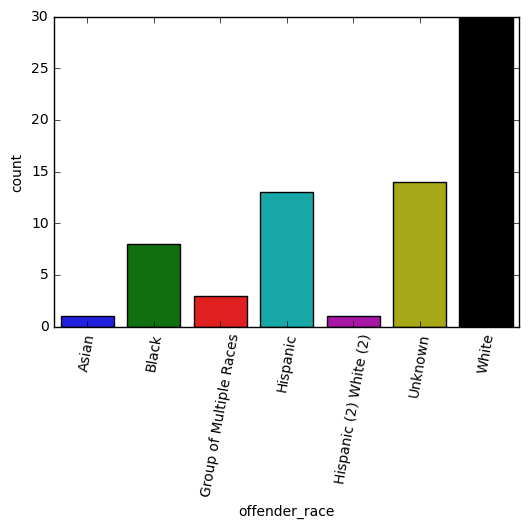

offender_race,Asian,Black,Group of Multiple Races,Hispanic,Hispanic (2) White (2),Unknown,White
bias,,,,,,,
Anti-Black,1,0,2,1,0,7,16
Anti-Buddhist,0,0,0,0,0,1,0
Anti-Disability,0,0,0,1,0,0,0
Anti-Hispanic,0,1,0,2,0,1,3
Anti-Jewish,0,0,0,0,0,3,1
Anti-LGBT,0,4,1,7,1,1,7
Anti-LGBT; Anti-Jewish,0,0,0,0,0,1,0
Anti-Muslim,0,0,0,1,0,0,3
Anti-White,0,3,0,1,0,0,0


In [20]:
# Create a dataframe for the offender ethnicity values
offenders_count = df.offender_race.value_counts()
display(offenders_count)
print("----------------------------------")

# Displaying the offender ethnicity values as proportions
offenders_count_pct = df.offender_race.value_counts(normalize=True)
display(offenders_count_pct)

plt.figure(dpi=100)
sb.countplot(df.offender_race)
plt.xticks(rotation="80")
plt.show()

off_race_bias = pd.crosstab(df.bias, df.offender_race)
display(off_race_bias)

Streets/Highway/Road/Alley            14
Residence/Home                        13
Highway/Road/Alley/Street/Sidewalk     6
Parking Lot/Garage                     5
Bar/Nightclub                          5
Convenience Store                      4
Highway/Road/Street                    4
Park/Playground                        2
Parking Lot                            2
Specialty Store                        1
Shelter-Mission/Homeless               1
School-Elementary/Secondary            1
Restaurant                             1
Parking/Drop Lot                       1
Parking Lots/ Garage                   1
Air/Bus/Train Terminal                 1
Bank/Savings and Loan                  1
Hotel/Motel                            1
Government/ Public Building            1
Drug Store/Dr.'s office/Hospital       1
Department/Discount Store              1
Church/Synagogue/Temple/Mosque         1
Church/Synagogue                       1
Other/Unknown                          1
Name: offense_lo

----------------------------------


Streets/Highway/Road/Alley            0.200000
Residence/Home                        0.185714
Highway/Road/Alley/Street/Sidewalk    0.085714
Parking Lot/Garage                    0.071429
Bar/Nightclub                         0.071429
Convenience Store                     0.057143
Highway/Road/Street                   0.057143
Park/Playground                       0.028571
Parking Lot                           0.028571
Specialty Store                       0.014286
Shelter-Mission/Homeless              0.014286
School-Elementary/Secondary           0.014286
Restaurant                            0.014286
Parking/Drop Lot                      0.014286
Parking Lots/ Garage                  0.014286
Air/Bus/Train Terminal                0.014286
Bank/Savings and Loan                 0.014286
Hotel/Motel                           0.014286
Government/ Public Building           0.014286
Drug Store/Dr.'s office/Hospital      0.014286
Department/Discount Store             0.014286
Church/Synago

offense_location,Air/Bus/Train Terminal,Bank/Savings and Loan,Bar/Nightclub,Church/Synagogue,Church/Synagogue/Temple/Mosque,Convenience Store,Department/Discount Store,Drug Store/Dr.'s office/Hospital,Government/ Public Building,Highway/Road/Alley/Street/Sidewalk,...,Parking Lot,Parking Lot/Garage,Parking Lots/ Garage,Parking/Drop Lot,Residence/Home,Restaurant,School-Elementary/Secondary,Shelter-Mission/Homeless,Specialty Store,Streets/Highway/Road/Alley
bias,,,,,,,,,,,,,,,,,,,,,
Anti-Black,0,0,0,1,0,3,0,1,1,3,...,1,2,0,0,4,0,0,1,0,7
Anti-Buddhist,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anti-Disability,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anti-Hispanic,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2
Anti-Jewish,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0
Anti-LGBT,0,0,4,0,0,0,1,0,0,1,...,1,2,1,0,6,0,0,0,1,3
Anti-LGBT; Anti-Jewish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Anti-Muslim,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
Anti-White,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


C:\Users\Robert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


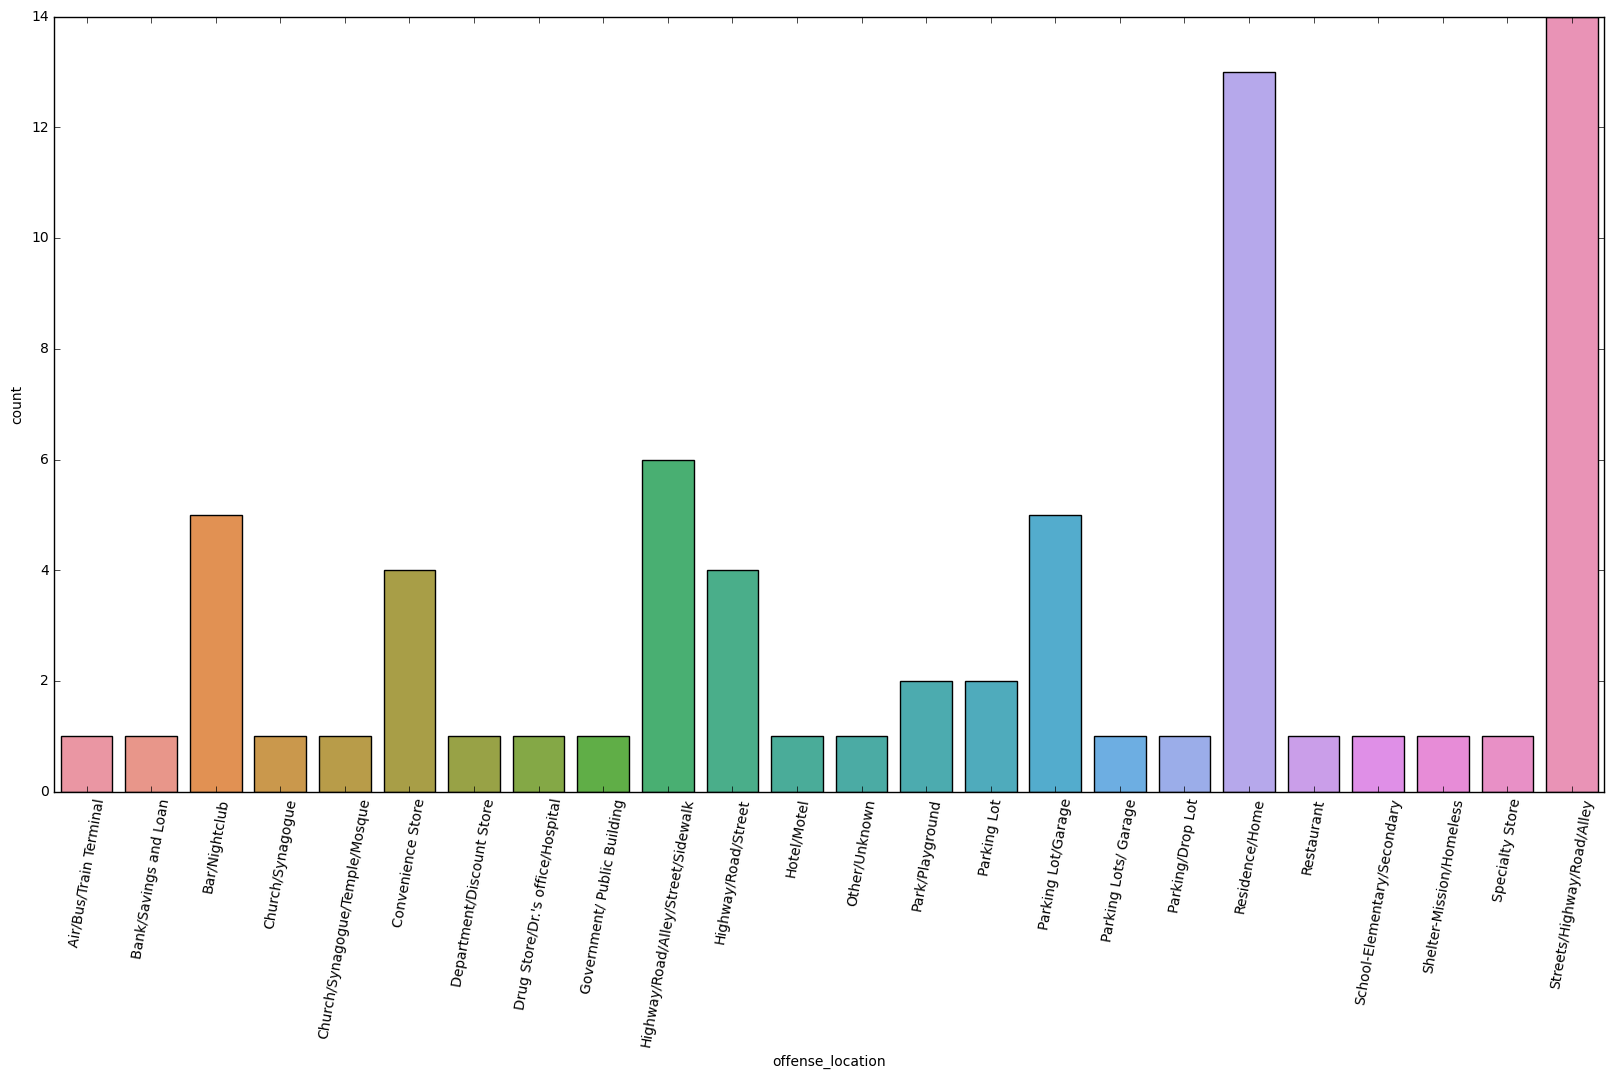

In [23]:
# Displaying 'offense location'
location = df.offense_location.value_counts()
display(location)
print("----------------------------------")

# Displaying 'offense location' as proportions
location_pct = df.offense_location.value_counts(normalize=True)
display(location_pct)


local_bias = pd.crosstab(df.bias, df.offense_location)
display(local_bias)

plt.figure(figsize=(20,10), dpi=100)
sb.countplot(df.offense_location)
plt.xticks(rotation="80")
plt.show()